# Group Project:
    Dhairya shah
    Japan Patel
    Mihir Mathur
    Ravi Patel

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data_ethereum = pd.read_csv("/Users/japanpatel/Desktop/Desktop/archive-2/coin_Ethereum.csv")

In [3]:
data_ethereum.head(5)

SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Ethereum    ETH  2015-08-08 23:59:59  2.798810  0.714725  2.793760   
1    2  Ethereum    ETH  2015-08-09 23:59:59  0.879810  0.629191  0.706136   
2    3  Ethereum    ETH  2015-08-10 23:59:59  0.729854  0.636546  0.713989   
3    4  Ethereum    ETH  2015-08-11 23:59:59  1.131410  0.663235  0.708087   
4    5  Ethereum    ETH  2015-08-12 23:59:59  1.289940  0.883608  1.058750   

      Close     Volume     Marketcap  
0  0.753325   674188.0  4.548689e+07  
1  0.701897   532170.0  4.239957e+07  
2  0.708448   405283.0  4.281836e+07  
3  1.067860  1463100.0  6.456929e+07  
4  1.217440  2150620.0  7.364501e+07

# Exploratory Data Analysis

In [4]:
from pandas_profiling import ProfileReport
ethereum_report = ProfileReport(data_ethereum)
ethereum_report

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
ethereum = data_ethereum[['Date','High','Low']]

In [6]:
ethereum['Date'] = ethereum['Date'].astype('datetime64[ns]')

<ipython-input-6-cfb022f6dd7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethereum['Date'] = ethereum['Date'].astype('datetime64[ns]')


In [7]:
ethereum = ethereum.set_index('Date')

In [8]:
ethereum.index

DatetimeIndex(['2015-08-08 23:59:59', '2015-08-09 23:59:59',
               '2015-08-10 23:59:59', '2015-08-11 23:59:59',
               '2015-08-12 23:59:59', '2015-08-13 23:59:59',
               '2015-08-14 23:59:59', '2015-08-15 23:59:59',
               '2015-08-16 23:59:59', '2015-08-17 23:59:59',
               ...
               '2021-02-18 23:59:59', '2021-02-19 23:59:59',
               '2021-02-20 23:59:59', '2021-02-21 23:59:59',
               '2021-02-22 23:59:59', '2021-02-23 23:59:59',
               '2021-02-24 23:59:59', '2021-02-25 23:59:59',
               '2021-02-26 23:59:59', '2021-02-27 23:59:59'],
              dtype='datetime64[ns]', name='Date', length=2031, freq=None)

In [9]:
high = ethereum['High'].resample('MS').mean()
low = ethereum['Low'].resample('MS').mean()

In [10]:
print(high['2020':])
print(low['2020':])

Date
2020-01-01     159.442776
2020-02-01     245.453986
2020-03-01     169.511597
2020-04-01     175.956581
2020-05-01     212.502076
2020-06-01     240.172738
2020-07-01     262.695335
2020-08-01     411.358920
2020-09-01     381.872428
2020-10-01     383.293530
2020-11-01     496.747152
2020-12-01     637.746457
2021-01-01    1259.225388
2021-02-01    1773.249814
Freq: MS, Name: High, dtype: float64
Date
2020-01-01     152.113435
2020-02-01     229.151555
2020-03-01     154.012528
2020-04-01     166.018574
2020-05-01     202.587462
2020-06-01     231.528894
2020-07-01     252.190550
2020-08-01     388.712387
2020-09-01     354.469682
2020-10-01     367.992954
2020-11-01     464.714135
2020-12-01     599.672113
2021-01-01    1109.896728
2021-02-01    1623.373293
Freq: MS, Name: Low, dtype: float64


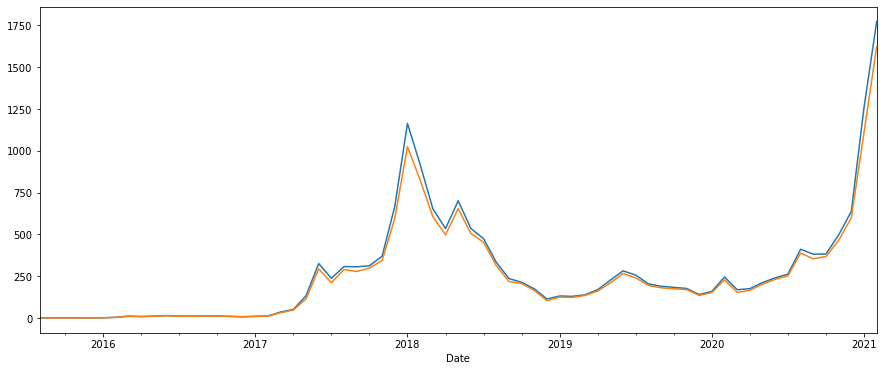

In [11]:
high.plot(figsize=(15, 6))
low.plot(figsize=(15,6))
plt.show()

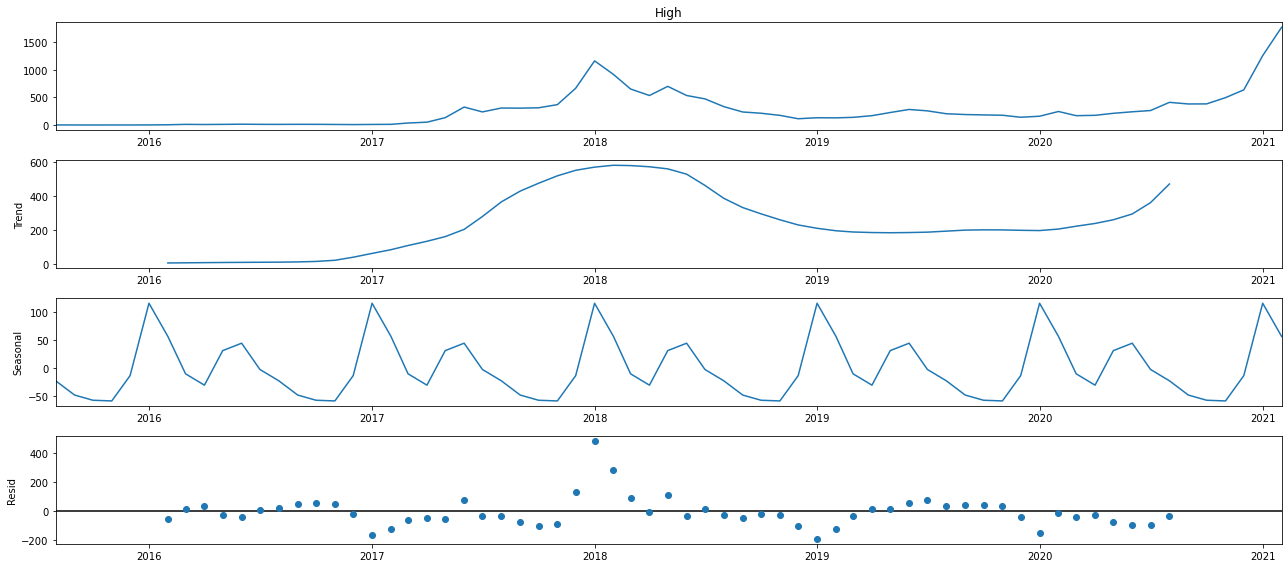

In [12]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(high, model='additive')
fig = decomposition.plot()

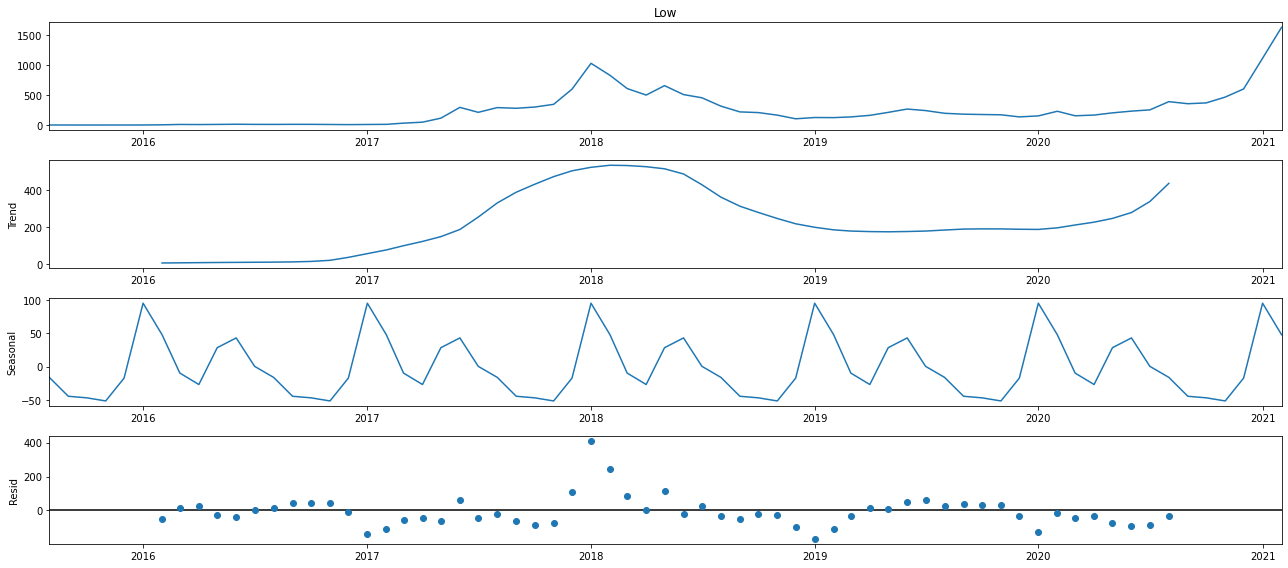

In [13]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(low, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
import warnings
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            modelhigh = sm.tsa.statespace.SARIMAX(high,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = modelhigh.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:987.6763034739168
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:813.8230006303718
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:815.4130724083019


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:646.7477119790392
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:825.9133268466194
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:804.2373340764793
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:655.6420723593633
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:646.9508668033887
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:911.2898479485992
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:751.6101514693296
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:755.2599715510589
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:585.006506377073
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:776.9498616356067
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:752.6547492231322
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:619.4796012126174
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:586.8610357081855
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:833.5307953430306
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:692.8257936702632
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:710.9180267277593


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:562.3120452609869
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:704.8101571297083
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:694.8226588398734
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:566.6651536895349
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:559.2928945640638
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:810.0038371836246
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:671.6610355263967
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:693.4910901224398


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:545.8189809752537
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:695.2260438480321
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:673.6599810455368
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:561.2441304933433
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:539.9825719196209
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:842.787413757307
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:703.1124578295774
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:725.197158705976


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:576.8384265425966
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:703.1126192869048
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:705.1124259982898
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:568.0742851820643
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:561.4699493440628
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:822.451409362537
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:684.5259928999392
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:707.5917509825813
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:542.4985124887884
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:696.276155415849
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:686.5229572233652
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:563.2474069610433
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:554.5985601336248
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:821.1870742660946
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:683.1320546587694
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:705.6399542208277


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:558.179966916361
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:683.1305413528403
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:685.129758959561
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:548.385781218813
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:552.3902002316972
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:810.7951682234918
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:672.6832326231637
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:695.0589757024864


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:547.7507407365572
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:684.4568315572731
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:674.6832143616791
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:550.0753967337896
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:541.259400814583


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            modellow = sm.tsa.statespace.SARIMAX(low,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = modellow.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:975.7575892529776
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:803.6586119917163
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:804.312864140796


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:638.0765935876619
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:815.0852983731015
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:793.5705870144101
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:646.9518260996036
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:638.236730785646
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:899.9386612713042
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:742.3501265452045
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:745.5392081570125
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:577.895137081146
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:767.3948712718598
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:738.6325759035354
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:611.5910871940874
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:579.7793508986465
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:818.1356398533665
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:680.2717545066764
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:697.7647376432062


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:551.95347137185
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:692.0186793051212
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:682.2680466749172
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:556.1846204069716
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:548.7619774304152
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:795.2673445098544
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:659.6737652840791
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:681.3627897142987


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:536.0147681076458
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:682.7794754268517
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:661.6715268244095
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:551.0483037175546
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:529.4912656309393
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:826.371568676411
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:689.6819485049059
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:711.7009926557157


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:566.2936781361379
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:689.6819931656793
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:691.6818297974244
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:557.3760055420443
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:551.5881411438237
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:806.6868986445045
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:671.6613397247754
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:695.3569740701455
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:533.0731647329992
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:683.1678763963819
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:673.6569093994428
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:552.9503736183625
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:543.8247930015655
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:804.948322599574
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:669.8927140281343
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:692.5800267508204


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:547.9022485715624
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:669.8920915882732
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:671.8912716192804
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:537.6503998964165
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:540.7312004589836
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:795.2997999892386
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:660.0931472554406
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:682.5459399658657


/Users/japanpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:537.9025889192226
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:671.6246438687788
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:662.0931360160242
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:539.5857097355753
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:530.1923764857131


In [17]:
modelhigh = sm.tsa.statespace.SARIMAX(high,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultshigh = modelhigh.fit()
print(resultshigh.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4389      0.160      2.740      0.006       0.125       0.753
ar.S.L12      -0.6642      0.093     -7.135      0.000      -0.847      -0.482
ma.S.L12       0.9983      0.195      5.115      0.000       0.616       1.381
sigma2      2.336e+04   8.38e-06   2.79e+09      0.000    2.34e+04    2.34e+04


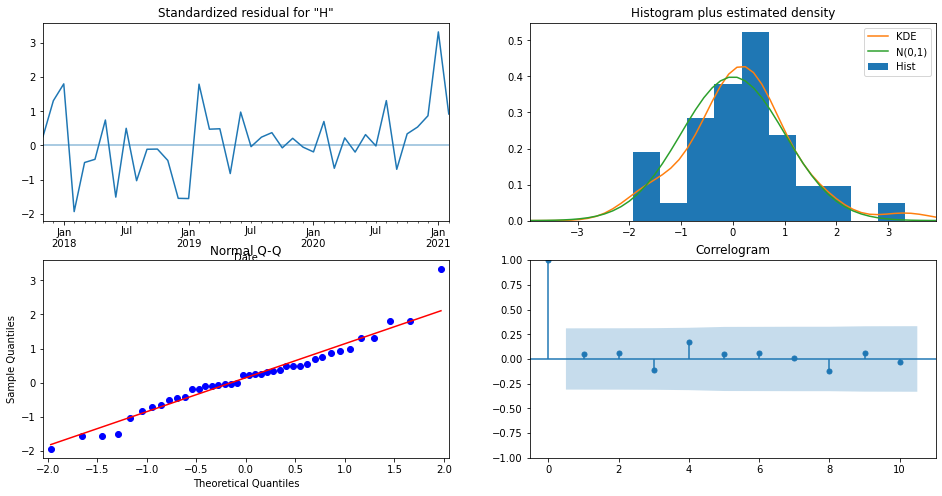

In [18]:
resultshigh.plot_diagnostics(figsize=(16, 8))
plt.show()

In [19]:
modellow = sm.tsa.statespace.SARIMAX(low,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultslow = modellow.fit()
print(resultslow.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3654      0.449      0.814      0.415      -0.514       1.245
ma.L1          0.1734      0.568      0.305      0.760      -0.940       1.287
ar.S.L12      -0.6881      0.096     -7.164      0.000      -0.876      -0.500
ma.S.L12       0.9989      0.201      4.976      0.000       0.605       1.392
sigma2      1.732e+04   1.16e-05   1.49e+09      0.000    1.73e+04    1.73e+04


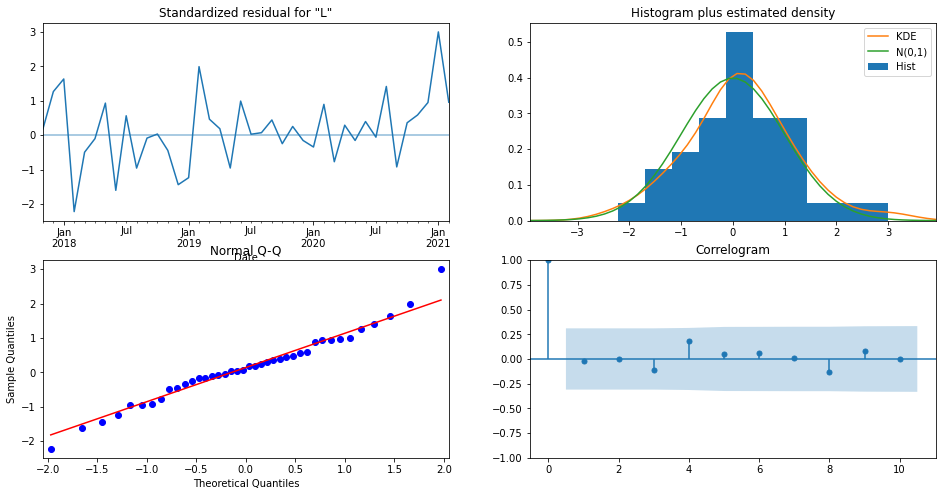

In [20]:
resultslow.plot_diagnostics(figsize=(16, 8))
plt.show()

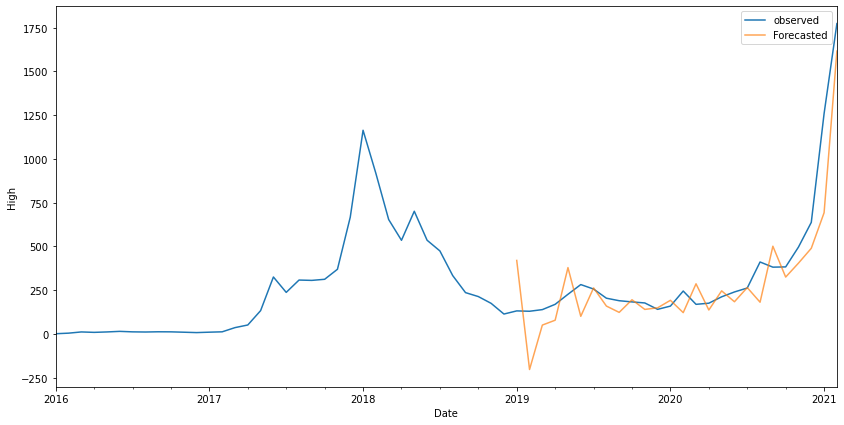

In [21]:
pred = resultshigh.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = high['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecasted', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('High')
plt.legend()
plt.show()

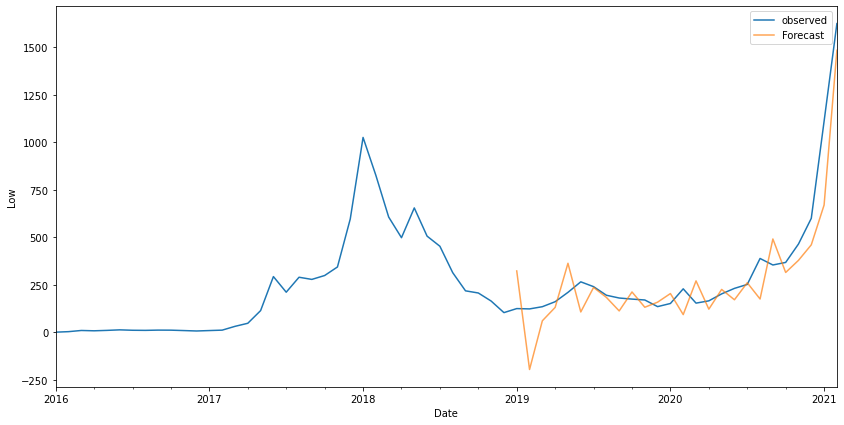

In [23]:
pred = resultslow.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = low['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Low')
plt.legend()
plt.show()

# 6 month forecasting visualisation

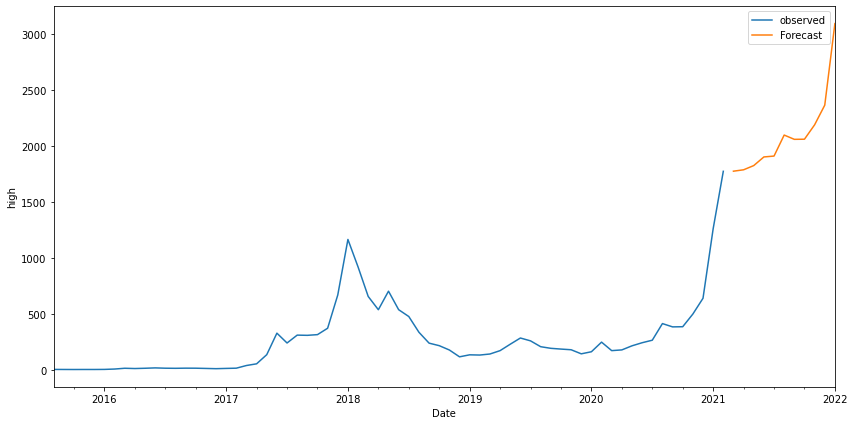

In [26]:
pred_uc = resultshigh.get_forecast(steps=11)
pred_ci = pred_uc.conf_int()
ax = high.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('high')
plt.legend()
plt.show()

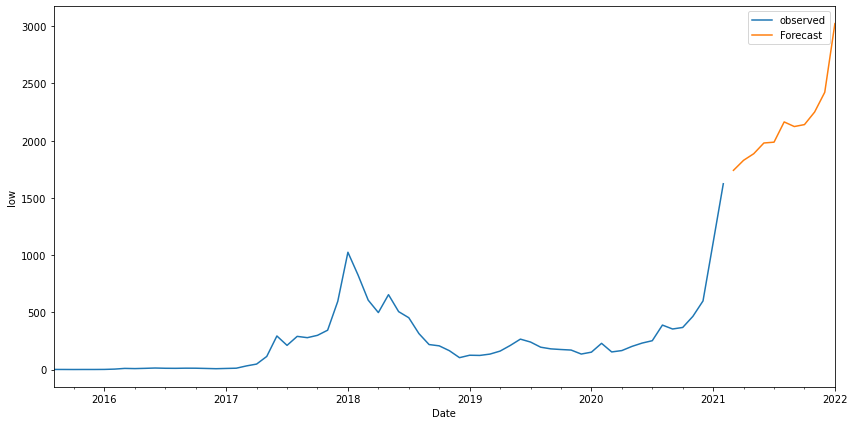

In [30]:
pred_uc = resultslow.get_forecast(steps=11)
pred_ci = pred_uc.conf_int()
ax = low.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('low')
plt.legend()
plt.show()